<a href="https://colab.research.google.com/github/keshavprof123/Credit-Risk-Modeling-Decision-Tree-vs.-Random-Forest-Performance-Analysis---A-Case-Study/blob/main/Credit_Risk_Modeling_Decision_Tree_vs_Random_Forest_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Case Study: Comparing Performance of Random Forest and Decision Tree for Credit Scoring.

Problem Statement: A financial institution is interested in predicting the creditworthiness of individuals applying for loans. The goal is to compare the performance of Random Forest and Decision Tree models in predicting whether an applicant is likely to default on a loan.

January19' 2024

In [1]:
import pandas as pd
import numpy as np

In [2]:
n_samples = 1000

age = np.random.randint(21, 70, size=n_samples)
income = np.random.randint(2000, 10000, size=n_samples)
debt_to_income = np.random.uniform(0, 1, size=n_samples)
credit_score = np.random.randint(300, 850, size=n_samples)
employment_duration = np.random.randint(0, 10, size=n_samples)
loan_amount = np.random.randint(1000, 50000, size=n_samples)
default_status = np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2])


data = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Debt-to-Income Ratio': debt_to_income,
    'Credit Score': credit_score,
    'Employment Duration': employment_duration,
    'Loan Amount': loan_amount,
    'Default Status': default_status
})


print(data.head())

   Age  Income  Debt-to-Income Ratio  Credit Score  Employment Duration  \
0   24    8732              0.187165           518                    0   
1   62    7254              0.746714           313                    8   
2   30    7983              0.857648           332                    9   
3   58    3430              0.347057           650                    7   
4   41    4671              0.508936           438                    5   

   Loan Amount  Default Status  
0        15436               0  
1        13858               1  
2        38681               1  
3        30621               0  
4        15407               0  


In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1000 non-null   int64  
 1   Income                1000 non-null   int64  
 2   Debt-to-Income Ratio  1000 non-null   float64
 3   Credit Score          1000 non-null   int64  
 4   Employment Duration   1000 non-null   int64  
 5   Loan Amount           1000 non-null   int64  
 6   Default Status        1000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 54.8 KB
None
               Age       Income  Debt-to-Income Ratio  Credit Score  \
count  1000.000000  1000.000000           1000.000000   1000.000000   
mean     44.636000  6066.986000              0.489264    569.570000   
std      14.255902  2263.099264              0.287678    162.642761   
min      21.000000  2003.000000              0.001683    300.000000   
25%      32.000000  4080.

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop('Default Status', axis=1)
y = data['Default Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 6)
Shape of y_train: (800,)
Shape of X_test: (200, 6)
Shape of y_test: (200,)


In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions)

print("Decision Tree Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1_score)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)

print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)

Decision Tree Metrics:
Accuracy: 0.67
Precision: 0.09090909090909091
Recall: 0.13333333333333333
F1 Score: 0.10810810810810811

Random Forest Metrics:
Accuracy: 0.845
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [11]:
scores_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1_score],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1_score]
}

scores_df = pd.DataFrame(scores_data)

print("\nComparison of Model Performance:")
print(scores_df.to_string(index=False))


Comparison of Model Performance:
   Metric  Decision Tree  Random Forest
 Accuracy       0.670000          0.845
Precision       0.090909          0.000
   Recall       0.133333          0.000
 F1 Score       0.108108          0.000


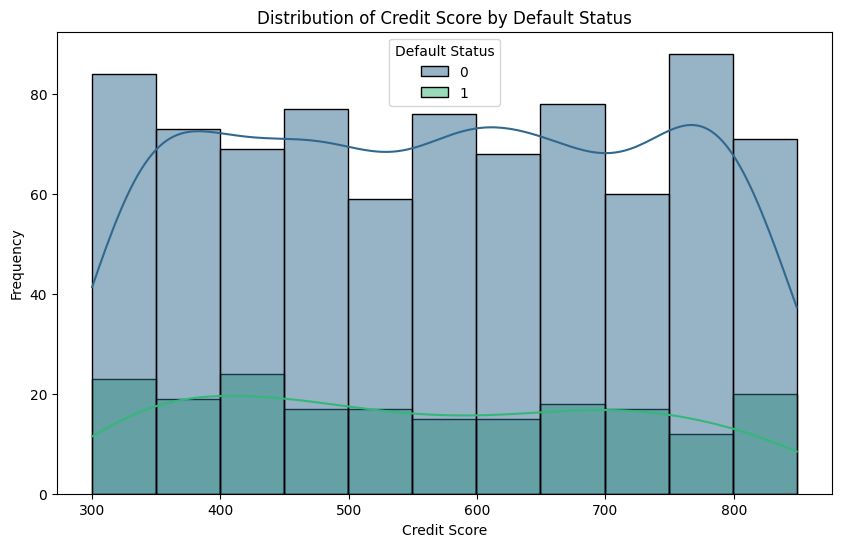

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graph 1: Distribution of 'Credit Score'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Credit Score', hue='Default Status', kde=True, palette='viridis')
plt.title('Distribution of Credit Score by Default Status')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

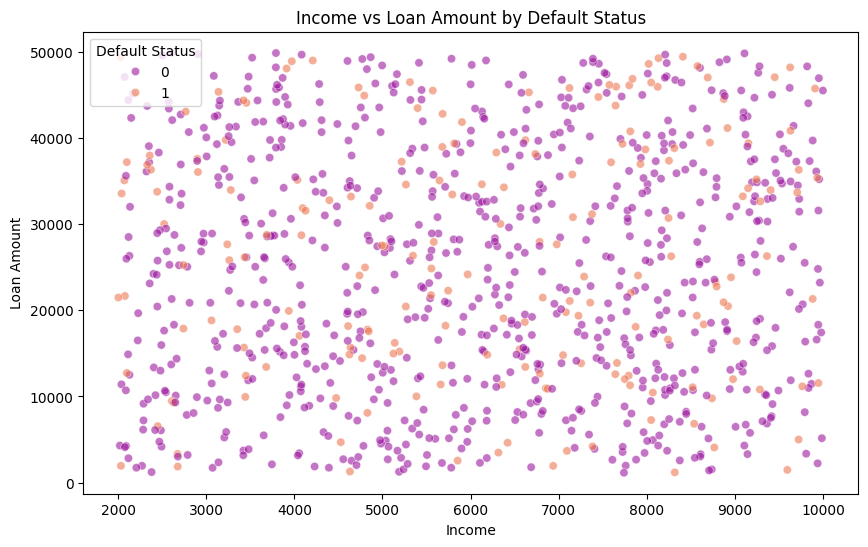

In [9]:
# Graph 2: Scatter plot of 'Income' vs 'Loan Amount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income', y='Loan Amount', hue='Default Status', alpha=0.6, palette='plasma')
plt.title('Income vs Loan Amount by Default Status')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

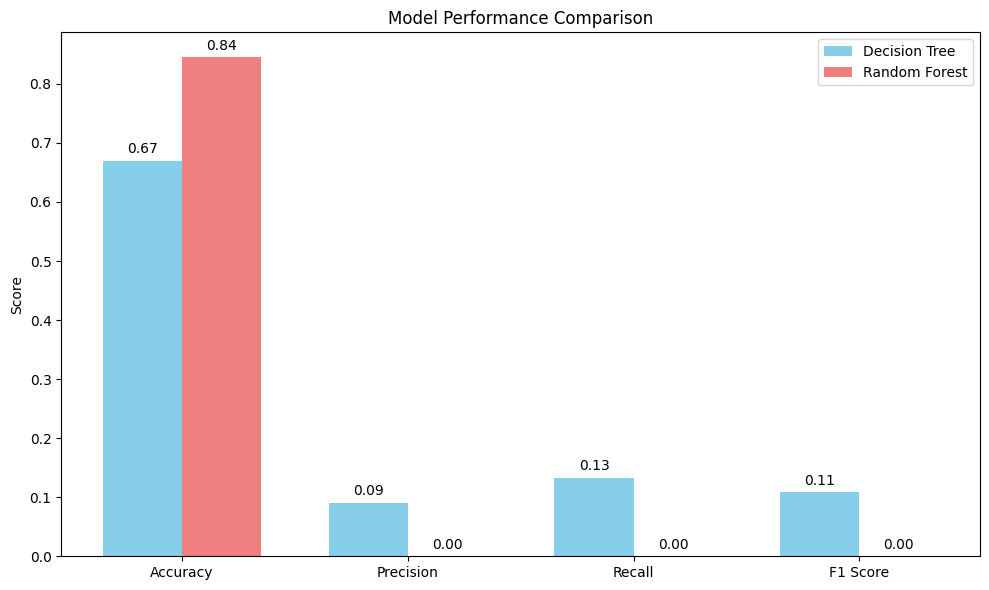

In [10]:
# Graph 3: Bar plot of Model Metrics
models = ['Decision Tree', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1_score]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1_score]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, dt_scores, width, label='Decision Tree', color='skyblue')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='lightcoral')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()